In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras import models, layers, optimizers, regularizers
# from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

import cv2

import os

In [2]:
# Get photos for model training
train = tf.keras.utils.image_dataset_from_directory('./data/archive/chest_xray/chest_xray/train')
test = tf.keras.utils.image_dataset_from_directory('./data/archive/chest_xray/chest_xray/test')
val = tf.keras.utils.image_dataset_from_directory('./data/archive/chest_xray/chest_xray/val')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


# Model 2
For this model we made the following changes:
1. Nodes in initial layer increased to 32


In [19]:
model = Sequential()

In [8]:
# Add layers to model
# input layer

model.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)))

# add pooling layer(takes max from input window)
model.add(layers.MaxPooling2D((2,2)))

# flattens 2d to 1d
model.add(layers.Flatten())

# add dense layer
model.add(layers.Dense(16, activation='relu'))

# add output layer
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# compile model with adam for binary model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
# fit model
history = model.fit(train,
               batch_size=30,
               epochs=10,
               validation_data=(val))

Epoch 1/10
163/163 [==============================] - 13s 69ms/step - loss: 75.3374 - accuracy: 0.8332 - val_loss: 0.6633 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 11s 67ms/step - loss: 0.3056 - accuracy: 0.8666 - val_loss: 0.5441 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 11s 66ms/step - loss: 0.2119 - accuracy: 0.9551 - val_loss: 0.2968 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 12s 68ms/step - loss: 0.1990 - accuracy: 0.9571 - val_loss: 0.4861 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 12s 70ms/step - loss: 6.2360 - accuracy: 0.6794 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 12s 67ms/step - loss: 0.7359 - accuracy: 0.2571 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 11s 66ms/step - loss: 0.6816 - accuracy: 0.6367 - val_loss: 0.6955 - val_accuracy

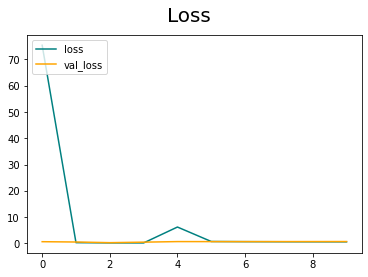

In [11]:
# examine loss of model across epochs
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

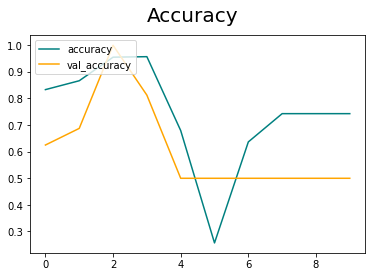

In [12]:
# examine accuracy of model across epochs
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [13]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [14]:
# Get precision, recall, and accuracy for test batch set
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 78ms/step


In [15]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.625, Recall: 1.0, Accuracy: 0.625


### Model 2 summary
Performance metrics for the second model are identical to the dummy model.

Compared to our dummy model, we have increased performance across all metrics(Recall is the same):
<br> ----------------Precision-----Accuracy-----Recall
<br> DUMMY------0.63----------0.63---------1
<br> FSM--------0.71----------0.74---------0.98
<br> MODEL2-----0.63----------0.63---------1